# 1. Data Loading:

Import libraries: Import necessary libraries like pandas and numpy.

Load dataset: Read the dataset into a Pandas DataFrame using pd.read_csv() or similar methods.

Preview data: Use .head() to view the first few rows and .info() to check the structure.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns   


In [2]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     -------------- ---------------------- 41.0/104.6 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 2.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.4/8.1 MB 8.9 MB/s eta 0:00:01
   --- ------------------------------------ 0.8/8.1 MB 8.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.1 MB 8.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.1 MB 9.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.1 MB 9.8 MB/s eta 0:00:01
   ------------- -------------------------- 2.8/8.1 MB 10.5 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 10.7 MB/s eta 0:00:01
   ------------------- -


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------------------- ------------------- 153.6/294.9 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [3]:
import os

# Get the absolute path to the spam.csv file
data_path = os.path.abspath('data/raw/spam.csv')

print(data_path)  # This will show you the full path, check if it's correct.

c:\Users\naren\Desktop\New_DS\spam_detection\notebook\data\raw\spam.csv


In [4]:
import os

# Define the path
data_path = 'c:/Users/naren/Desktop/New DS/spam detection/notebook/data/raw/spam.csv'

# Check if the file exists
if os.path.exists(data_path):
    print("File found!")
else:
    print("File not found, check the path.")

File not found, check the path.


In [5]:
data_path = './data/raw/spam.csv'

# Check if the file exists
if os.path.exists(data_path):
    print("File found!")
else:
    print("File not found, check the path.")

File not found, check the path.


In [6]:
# Print the current working directory
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\naren\Desktop\New_DS\spam_detection\notebook


# The relative path from the notebook folder to spam.csv should be:

'../data/raw/spam.csv'

In [7]:
# Define the relative path to the data file from the notebook folder
data_path = '../data/raw/spam.csv'

# # Load the data using pandas with a different encoding
df = pd.read_csv(data_path, encoding='ISO-8859-1')

#ISO-8859-1 (also known as latin1) is a common encoding used in files that contain non-UTF-8 characters.

# If this encoding doesn't work, you can also try other encodings like utf-16.

# Display the first few rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
# Define the relative path to the data file from the notebook folder
data_path = '../data/raw/spam.csv'

# Load the data, but skip the extra columns by using the `usecols` parameter
df = pd.read_csv(data_path, usecols=[0, 1], encoding='ISO-8859-1')

# Rename the columns to 'label' and 'text'
df.columns = ['label', 'text']

# Display the first few rows to verify the changes
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#  2. Data Exploration & Cleaning--What we need to do:

Check for missing values: Identify columns that contain missing values and decide how to handle them.

Check for duplicates: Duplicate rows may exist, which should be removed.

Basic structure of the data: Check the data types and summarize the dataset.

Visualize the distribution: For a binary classification like spam vs ham, visualize the balance of the target variable.

Text length distribution: Analyze the distribution of text length for both spam and ham messages.

In [9]:
# Display basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
label    0
text     0
dtype: int64


In [11]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 403


In [ ]:

# In Pandas, the inplace parameter is used to control whether the operation modifies the original 
# DataFrame directly or if it returns a new DataFrame with the operation applied.
# Summary:
# inplace=True: Modifies the original DataFrame directly and does not return anything.

# inplace=False (default): Returns a new DataFrame, and the original DataFrame remains unchanged.

# if you want to update the data permanently and don’t need to keep a backup: inplace=True is fine.

# If you want to keep the original data and create a new modified version: Use inplace=False
#  and store the result in a new DataFrame (like df_clean).

## Remove duplicates but do not modify the original data:

In [12]:
# Remove duplicates but do not change the original dataframe
clean_data = df.drop_duplicates(inplace=False)

# Check the number of rows after dropping duplicates
print(f"Rows after dropping duplicates: {clean_data.shape[0]}")

Rows after dropping duplicates: 5169


##  Save cleaned_spam to Processed Folder inside the data directory

In [13]:
import os

# Define the path to the processed folder
processed_folder = './data/processed/'

# Check if the folder exists, if not create it
if not os.path.exists(processed_folder):
    os.makedirs(processed_folder)

# Define the path to save the cleaned data
processed_data_path = os.path.join(processed_folder, 'cleaned_spam.csv')

# Save the cleaned data to the processed folder
clean_data.to_csv(processed_data_path, index=False)

print(f"Cleaned data has been saved to {processed_data_path}")

Cleaned data has been saved to ./data/processed/cleaned_spam.csv


In [14]:
# Define the relative path to the processed folder inside the 'data' directory
processed = '../data/processed/'

# Check if the folder exists, if not create it
if not os.path.exists(processed):
    os.makedirs(processed)

# Define the path to save the cleaned data inside the 'processed' folder
processed_data_path = os.path.join(processed, 'cleaned_spam.csv')

# Save the cleaned data to the processed folder
clean_data.to_csv(processed_data_path, index=False)

print(f"Cleaned data has been saved to {processed_data_path}")


Cleaned data has been saved to ../data/processed/cleaned_spam.csv


# Note:
df.shape returns the tuple (5169, 2), which means the DataFrame has 5169 rows and 2 columns.

df.shape[0] gives 5169, which is the number of rows.

df.shape[1] gives 2, which is the number of columns.

df.shape[0]: Gives the number of rows in the DataFrame.

df.shape[1]: Gives the number of columns in the DataFrame.

[] is used to access rows, columns, or specific values in a DataFrame or Series:

df['column_name'] for columns.

df.iloc[] for integer-based indexing of rows and columns.

+++++

Using [] in df:
df[0]: This would raise an error because df is a DataFrame, and you can't directly index by integers like a list. You must specify the column name.

df['column_name']: You use [] to access a column in a DataFrame by specifying the column name (e.g., df['Age']).

df.iloc[]: If you want to select rows or columns by integer index, you can use .iloc[]:

df.iloc[0]: Accesses the first row (index 0).

df.iloc[:, 0]: Accesses the first column (index 0).

In [15]:
df.shape

(5572, 2)

In [16]:
# Check the distribution of spam and ham: how a data is distributed (or split) across categories.
label_counts = df['label'].value_counts()
print(f"Distribution of Labels (Spam/Ham):\n{label_counts}")

Distribution of Labels (Spam/Ham):
label
ham     4825
spam     747
Name: count, dtype: int64


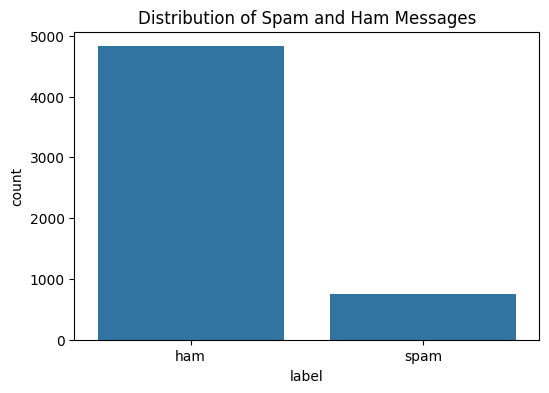

In [17]:
# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

#  Why apply() is used here:

apply() allows you to apply the len() function to every element in the text column, which is not something you can directly do with the DataFrame without apply().

Without apply(), you would need a loop to iterate over the column and manually compute the length for each text. apply() provides a more efficient and readable way to do that.

apply() allows you to apply a function to every element in a column (or across rows, depending on the axis).

In this case, len() is applied to each message in the text column, and the result (the length of each message) is stored in a new column called text_length.

# Example in Context of creating a new column:

Without text_length: You only have raw text data (messages), which may not provide enough structured information for the model.

With text_length: You now have both the raw text and an additional feature (text_length), which may help the model distinguish between spam and ham messages based on length patterns.

In [18]:
# Add a column for the length of the text
df['text_length'] = df['text'].apply(len)

# Writing len() would try to run it immediately (and error out)

# Writing just len gives the function as an argument to .apply()

# Use .apply() on a Series → no axis needed

# Use .apply() on a DataFrame → axis=1 if row-wise, axis=0 if column-wise

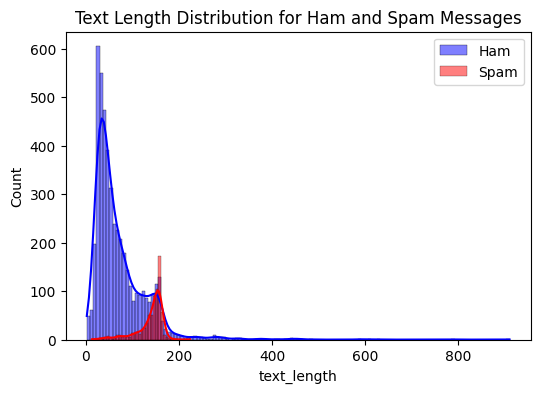

In [19]:
# Visualize the text length distribution for spam and ham messages
plt.figure(figsize=(6, 4))
sns.histplot(df[df['label'] == 'ham']['text_length'], color='blue', label='Ham', kde=True)
sns.histplot(df[df['label'] == 'spam']['text_length'], color='red', label='Spam', kde=True)
plt.title('Text Length Distribution for Ham and Spam Messages')
plt.legend()
plt.show()

# Note:

This chart shows the length of messages for Ham (legitimate) and Spam messages:

X-axis: The length of the messages (number of characters).

Y-axis: The count of messages with that length.

Blue (Ham): Legitimate messages, mostly short.

Red (Spam): Spam messages, mostly short too but fewer in number.

Takeaways:
Ham messages are often longer and vary more in length.

Spam messages tend to be shorter.

This can help in distinguishing spam from ham based on message length.

This graph provides insights into how the length of messages can help differentiate spam from legitimate communication. You can further use it as part of your feature engineering process.

# Conclusion:

Text length could be a valuable feature for a machine learning model.

Spam might be identified based on its relatively shorter length.

Legitimate messages tend to be longer and more detailed.

In [20]:
# Display first few rows to confirm
df.head()

,label,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Save cleaned_spam to Processed Folder inside the source directory

# Don't run the following  code

In [22]:
# Define the path to the processed_data folder inside the source directory
processed_data_path = '../source/processed_data/cleaned_spam.csv'

# Create the directory if it doesn't exist
if not os.path.exists(os.path.dirname(processed_data_path)):
    os.makedirs(os.path.dirname(processed_data_path))

# Save the cleaned data to the processed_data folder
df.to_csv(processed_data_path, index=False)

# Print confirmation
print(f"Cleaned data has been saved to {processed_data_path}")


Cleaned data has been saved to ../source/processed_data/cleaned_spam.csv


In [73]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp311-cp311-win_amd64.whl (299 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


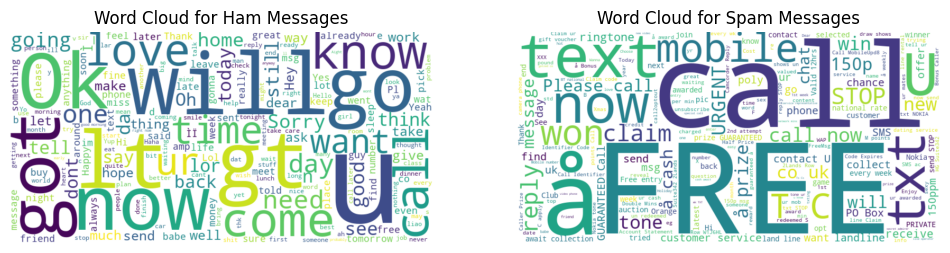

In [23]:
from wordcloud import WordCloud

# Create a word cloud for Ham messages
ham_text = ' '.join(df[df['label'] == 'ham']['text'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Create a word cloud for Spam messages
spam_text = ' '.join(df[df['label'] == 'spam']['text'])
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.show()